# Question 2: Does distance from the city have an affect on House Price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols

import folium
from folium.plugins import MarkerCluster # for clustering the markers

In [2]:
df = pd.read_csv('~/flatiron/mod2/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/csv/datawithnewcols.csv',index_col = 0)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,19,19,True,25.295727,15.508940,15.508940,32.449837


In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price','distance_from_a_city']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.reset_index(drop=True,inplace = True)

# Looking at different visualisation for price vs distance from city

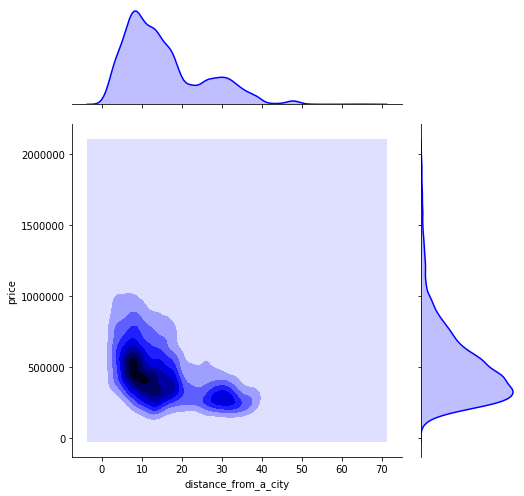

In [6]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'kde', height = 7, 
              color = 'b', ratio = 3)


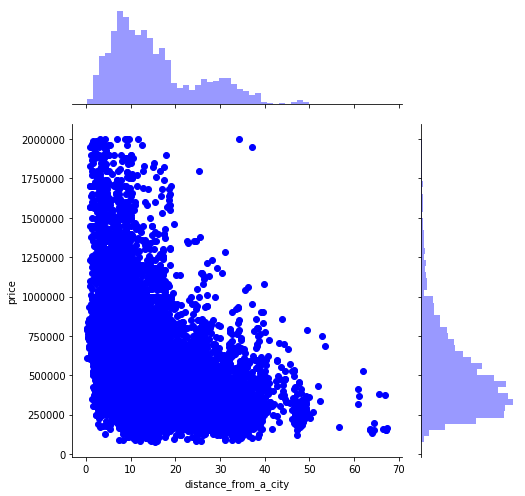

In [7]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'scatter', height = 7, 
              color = 'b', ratio = 3)


In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Age_of_House', 'Years_last_renovation',
       'basement', 'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

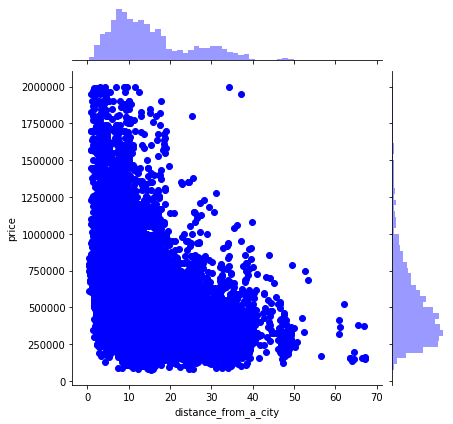

In [9]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, color='b').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

**Here it is clear that houses above 1milllion are located withing 20km of the City**

# Distance from Bellevue

In [10]:
# mp = folium.Map(location=[47.610378, -122.200676], zoom_start=10)

# # add a marker for every record in the filtered data, use a clustered view
# marker_cluster = MarkerCluster().add_to(mp) # create marker clusters
# for i in range(df.shape[0]):
#     location = [df['lat'][i],df['long'][i]]
#     tooltip = f"House ID: {df['id'][i]}"

#     folium.Marker(location=location,tooltip=tooltip).add_to(marker_cluster)

# folium.Circle([47.610378, -122.200676],
#                     radius=10000
#                    ).add_to(mp)
# folium.Circle([47.610378, -122.200676],
#                     radius=15000).add_to(mp)


# mp.save(outfile = '../maps/my_map_radius.html')

In [11]:
from IPython.display import Image


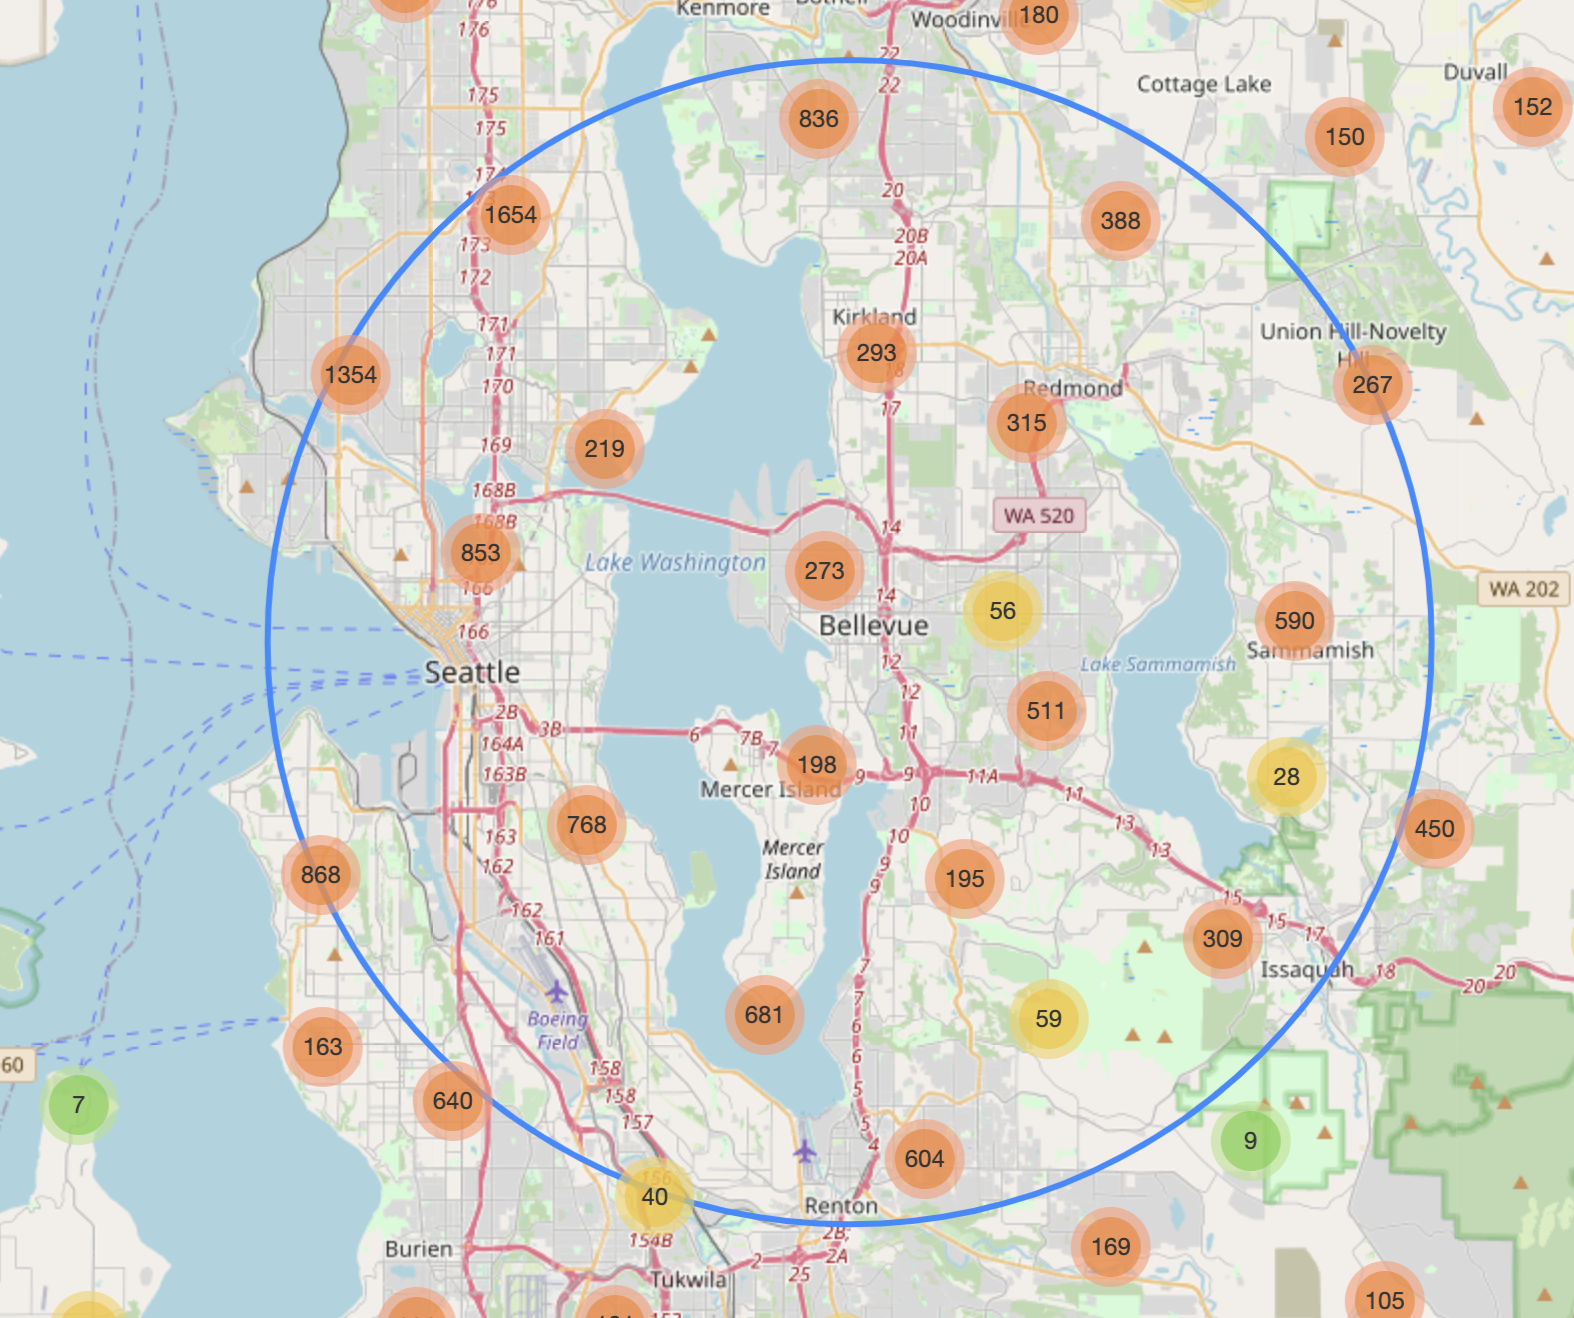

In [12]:
Image(filename = '../images/mapwithradius.png', width=1000, height=1000)

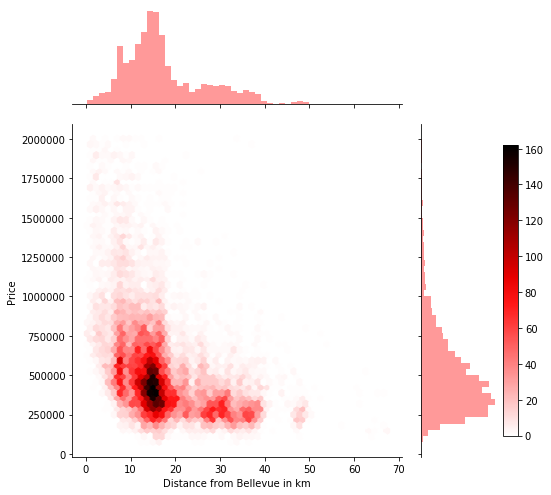

In [13]:
ax = sns.jointplot(x='distance_from_bellevue',y='price',data=df, kind = 'hex', height = 7, 
              color = 'r', ratio = 3)
ax.set_axis_labels("Distance from Bellevue in km","Price")
cbar_ax = ax.fig.add_axes()  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

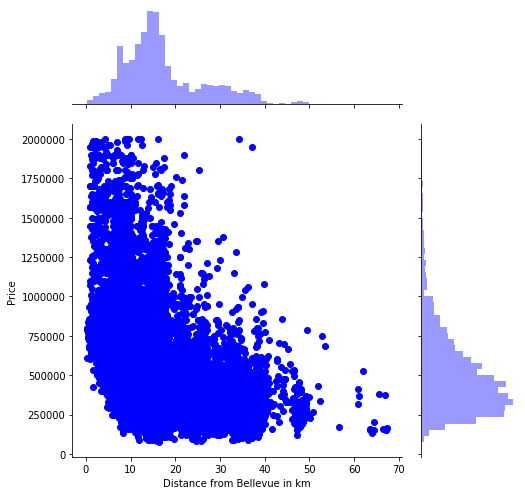

In [14]:
ax = sns.jointplot(x='distance_from_bellevue',y='price',data=df, kind = 'scatter', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Distance from Bellevue in km","Price")

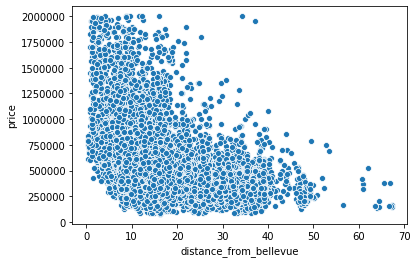

In [15]:
sns.scatterplot(x='distance_from_bellevue',y='price',data=df)

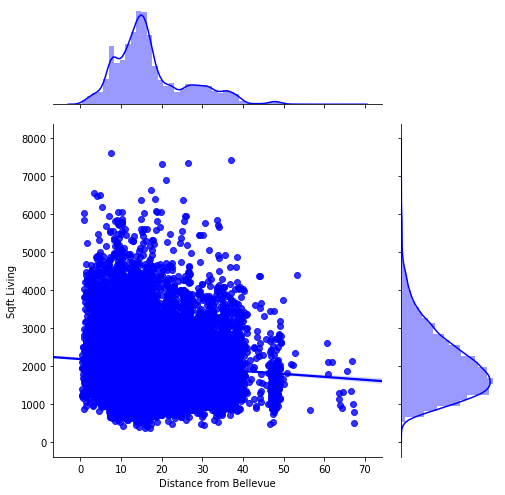

In [16]:
ax = sns.jointplot(x='distance_from_bellevue',y='sqft_living',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Distance from Bellevue","Sqft Living")

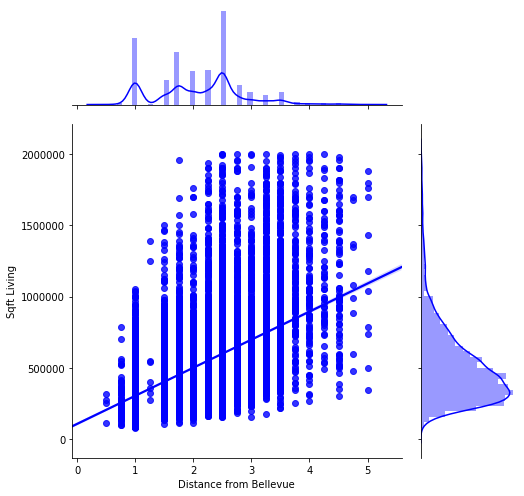

In [17]:
ax = sns.jointplot(x='bathrooms',y='price',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Distance from Bellevue","Sqft Living")

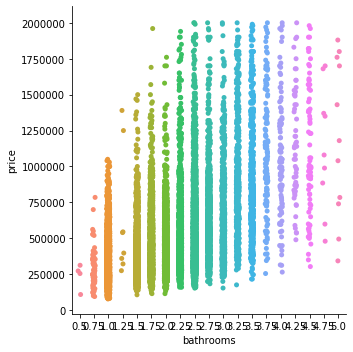

In [18]:
sns.catplot(x='bathrooms',y='price',data=df)

# Distance from Seattle

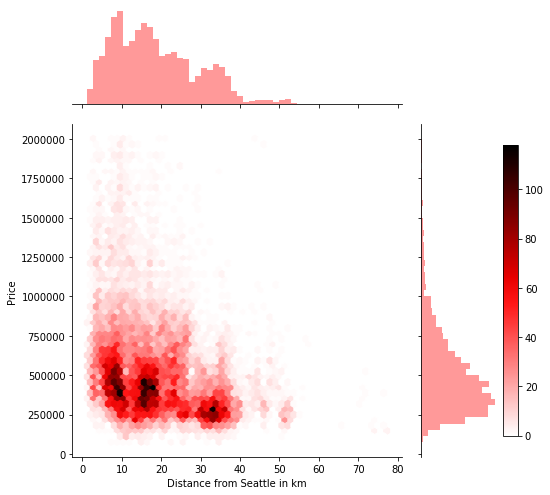

In [19]:
ax = sns.jointplot(x='distance_from_seattle',y='price',data=df, kind = 'hex', height = 7, 
              color = 'r', ratio = 3)
ax.set_axis_labels("Distance from Seattle in km","Price")
cbar_ax = ax.fig.add_axes()  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

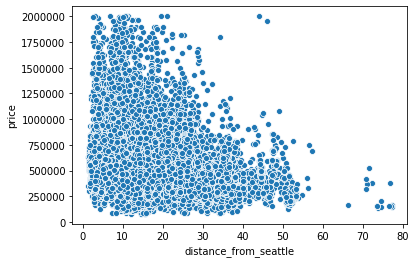

In [20]:
sns.scatterplot(x='distance_from_seattle',y='price',data=df)

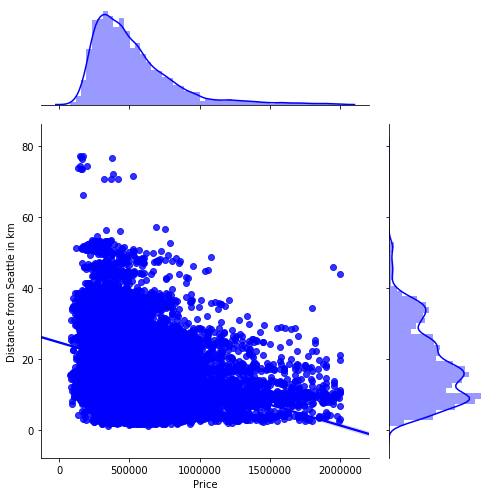

In [21]:
ax = sns.jointplot(y='distance_from_seattle',x='price',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Price","Distance from Seattle in km")

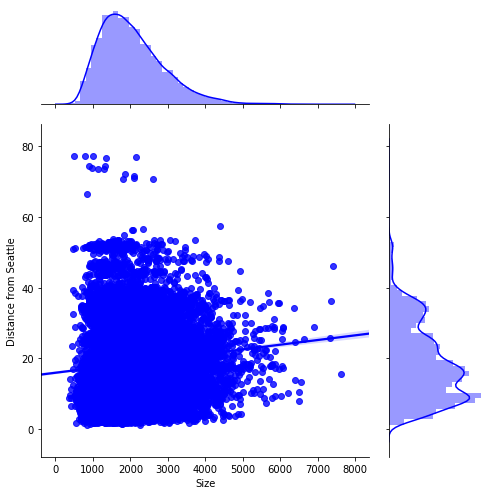

In [22]:
ax = sns.jointplot(y='distance_from_seattle',x='sqft_living',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Size","Distance from Seattle")

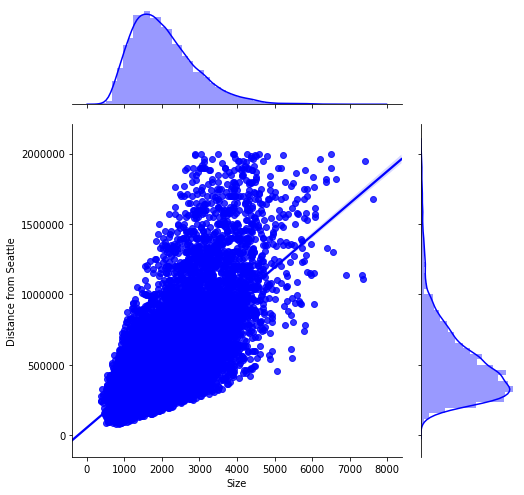

In [23]:
ax = sns.jointplot(y='price',x='sqft_living',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Size", "Distance from Seattle")

# Conclusion
By looking at the plot we can see houses above $1 milllion are located withing 20km of Bellevue. And for homes within 50km of Seattle, Although the price/house increases the bigger the sqft, the price/sqft reduces the the further away from Seattle a house is.

# Recommendation
I'll definitely recommend investing in homes 50km from Seattle which is also about 20km from Bellevue. By doing this you'll get more space for a less price which will also translate into higher returns.

# Perform a Single Variable Regression using distance from a city 

In [24]:
X1 = df['distance_from_a_city']
y1 = df['price']

In [25]:
X1 = sm.add_constant(X1)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
model = sm.OLS(y1,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     4343.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:32:01   Log-Likelihood:            -2.6381e+05
No. Observations:               19002   AIC:                         5.276e+05
Df Residuals:                   19000   BIC:                         5.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.128e+05   3489.828    204.255      0.000    7.06e+05     7.2e+05
distance_from_a_city -1.254e+04    190.289    -65.899      0.000   -1.29e+04   -1.22e+04
==============================================================================
Omnibus:                     6668.460   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26253.223
Skew:                           1.725   Prob(JB):                         0.00
Kurtosis:                       7.611   Cond. No.                         34.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params

const                   712814.735260
distance_from_a_city    -12539.762578
dtype: float64

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     4343.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:32:01   Log-Likelihood:            -2.6381e+05
No. Observations:               19002   AIC:                         5.276e+05
Df Residuals:                   19000   BIC:                         5.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.128e+05 